Now that we have picked two schedules with selected trials (reward-effort pairings) to include, this script will create 16 unique schedules:
- 2 schedules with 2 trial-orders (2 approach (/avoid) blocks will have one order, the other 2 approach (/avoid) blocks will have another order)
    - Block 1: Approach (/avoid), heart rate, normal effort --> trial-order 1
    - Block 2: Approach (/avoid), heart rate, shifted effort --> trial-order 2
    - Block 3: Approach (/avoid), reward rate, normal effort --> trial-order 1
    - Block 4: Approach (/avoid), reward rate, shifted effort --> trial-order 2
- change action type after 4 blocks, change attentional focus after every 2 blocks, change global effort state after every 1 block
- counter balanacing all orders (start with approach vs avoid, with heart vs reward, with normal vs shifted) gives 2x2x2 = 8 possbile block orders (or x 2 = 16 if also counter balancing trial order)
- 2 schedules x 8 block orders = 16 unique schedules
- 3 x 2 x 1 = 6 TUS session orders 

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations

### Schedule A

In [104]:
# Load the schedule
schedule_A = pd.read_csv('../generate_trial_schedules/trial_schedule_1.csv')
schedule_A = schedule_A.iloc[:, 1:-2]

# Separate the schedules by action type
schedule_A_approach = schedule_A[schedule_A['action_type'] == 'approach']
schedule_A_avoid = schedule_A[schedule_A['action_type'] == 'avoid']

# Normalize function
def normalize(data):
    data = abs(data)
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#### Approach - Order 1

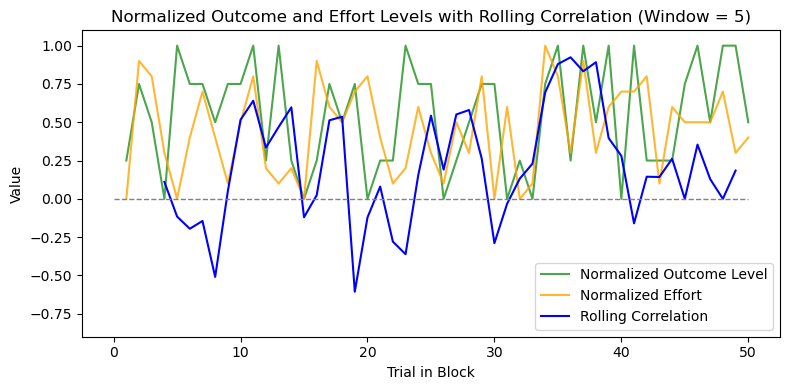

Overall Correlation = 0.25


In [105]:
# Generate the first order of 'approach' trials
seed = 40
schedule_A_approach_order1 = schedule_A_approach.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_A_approach_order1['trial_in_block'] = range(1, len(schedule_A_approach_order1) + 1)


window_size = 5
outcomes = schedule_A_approach_order1['outcome_level']
actual_outcomes = schedule_A_approach_order1['actual_outcome']
efforts = schedule_A_approach_order1['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_A_approach_order1) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_A_approach_order1), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")


#### Approach - Order 2

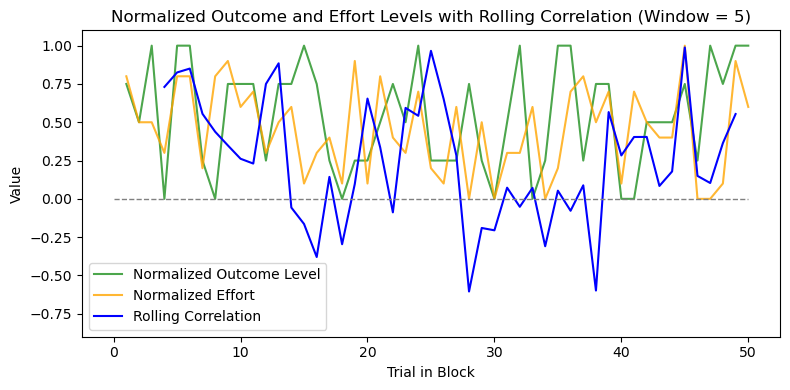

Overall Correlation = 0.25


In [106]:
# Generate the second order of 'approach' trials using a different seed
seed = 50
schedule_A_approach_order2 = schedule_A_approach.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_A_approach_order2['trial_in_block'] = range(1, len(schedule_A_approach_order2) + 1)

window_size = 5
outcomes = schedule_A_approach_order2['outcome_level']
actual_outcomes = schedule_A_approach_order2['actual_outcome']
efforts = schedule_A_approach_order2['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_A_approach_order2) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_A_approach_order2), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")

#### Avoid - Order 1

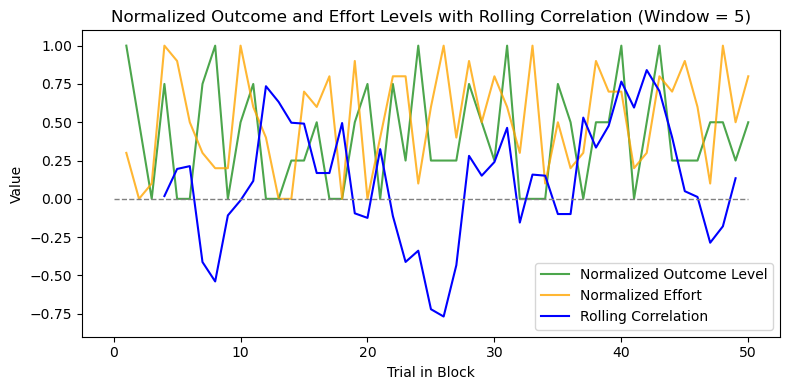

Overall Correlation = 0.11


In [107]:
# Generate the first order of 'avoid' trials
seed = 40
schedule_A_avoid_order1 = schedule_A_avoid.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_A_avoid_order1['trial_in_block'] = range(1, len(schedule_A_avoid_order1) + 1)


window_size = 5
outcomes = schedule_A_avoid_order1['outcome_level']
actual_outcomes = schedule_A_avoid_order1['actual_outcome']
efforts = schedule_A_avoid_order1['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_A_avoid_order1) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_A_avoid_order1), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")


#### Avoid - Order 2

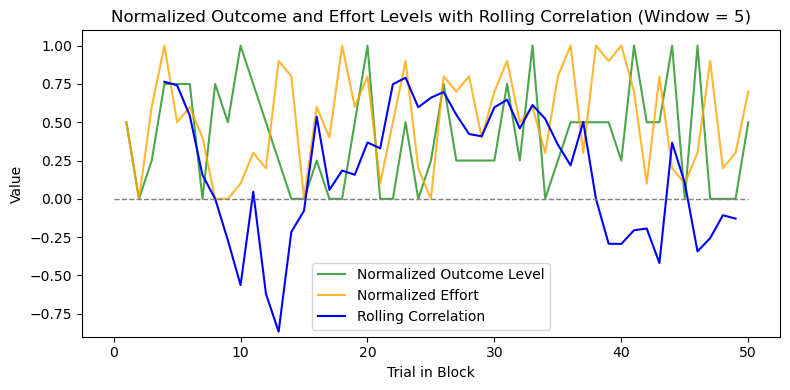

Overall Correlation = 0.11


In [108]:
# Generate the second order of 'approach' trials using a different seed
seed = 50
schedule_A_avoid_order2 = schedule_A_avoid.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_A_avoid_order2['trial_in_block'] = range(1, len(schedule_A_avoid_order2) + 1)


window_size = 5
outcomes = schedule_A_avoid_order2['outcome_level']
actual_outcomes = schedule_A_avoid_order2['actual_outcome']
efforts = schedule_A_avoid_order2['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_A_avoid_order2) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_A_avoid_order2), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")

#### Schedule A 1-8

In [109]:
# Define the block order patterns
action_type_patterns = [
    ['approach', 'approach', 'approach', 'approach', 'avoid', 'avoid', 'avoid', 'avoid'],
    ['avoid', 'avoid', 'avoid', 'avoid', 'approach', 'approach', 'approach', 'approach']
]
trial_order_patterns = [
    ['order1', 'order2', 'order1', 'order2', 'order1', 'order2', 'order1', 'order2']
]
attention_focus_patterns = [
    ['heart', 'heart', 'reward', 'reward', 'heart', 'heart', 'reward', 'reward'],
    ['reward', 'reward', 'heart', 'heart', 'reward', 'reward', 'heart', 'heart']
]
global_effort_state_patterns = [
    ['normal', 'shifted', 'normal', 'shifted', 'normal', 'shifted', 'normal', 'shifted'],
    ['shifted', 'normal', 'shifted', 'normal', 'shifted', 'normal', 'shifted', 'normal']
]

# Function to create a schedule from a given pattern
def create_schedule(action_type_pattern, trial_order_pattern, attention_focus_pattern, global_effort_state_pattern):
    trial_schedule = []
    trial_in_experiment = 1

    for block_number in range(8):
        action_type = action_type_pattern[block_number]
        trial_order = trial_order_pattern[block_number]
        attention_focus = attention_focus_pattern[block_number]
        global_effort_state = global_effort_state_pattern[block_number]

        if action_type == 'approach':
            df = schedule_A_approach_order1.copy() if trial_order == 'order1' else schedule_A_approach_order2.copy()
        else:
            df = schedule_A_avoid_order1.copy() if trial_order == 'order1' else schedule_A_avoid_order2.copy()

        df['trial_order'] = trial_order
        df['attention_focus'] = attention_focus
        df['global_effort_state'] = global_effort_state
        df['trial_in_experiment'] = range(trial_in_experiment, trial_in_experiment + len(df))
        df['block_number'] = block_number + 1
        trial_in_experiment += len(df)
        trial_schedule.append(df)

    return pd.concat(trial_schedule)


# Generate the 8 possible schedules
schedules = []
for i, action_type_pattern in enumerate(action_type_patterns):
    for j, trial_order_pattern in enumerate(trial_order_patterns):
        for k, attention_focus_pattern in enumerate(attention_focus_patterns):
            for l, global_effort_state_pattern in enumerate(global_effort_state_patterns):
                schedule = create_schedule(action_type_pattern, trial_order_pattern, attention_focus_pattern, global_effort_state_pattern)
                schedules.append(schedule)
                schedule['schedule_version'] = f'schedule_A_{len(schedules)}'
                file_name = f'schedule_A_{len(schedules)}.csv'
                schedule.to_csv(file_name, index=False)
                print(f'Saved {file_name}')

Saved schedule_A_1.csv
Saved schedule_A_2.csv
Saved schedule_A_3.csv
Saved schedule_A_4.csv
Saved schedule_A_5.csv
Saved schedule_A_6.csv
Saved schedule_A_7.csv
Saved schedule_A_8.csv


In [110]:
check_schedule = pd.read_csv('schedule_A_1.csv')
check_schedule

,outcome_level,actual_outcome,effort,action_type,trial_in_block,trial_order,attention_focus,global_effort_state,trial_in_experiment,block_number,schedule_version
0,40,32,50,approach,1,order1,heart,normal,1,1,schedule_A_1
1,80,91,95,approach,2,order1,heart,normal,2,1,schedule_A_1
2,60,58,90,approach,3,order1,heart,normal,3,1,schedule_A_1
3,20,19,65,approach,4,order1,heart,normal,4,1,schedule_A_1
4,100,95,50,approach,5,order1,heart,normal,5,1,schedule_A_1
...,...,...,...,...,...,...,...,...,...,...,...
395,-100,-115,65,avoid,46,order2,reward,shifted,396,8,schedule_A_1
396,-20,-18,95,avoid,47,order2,reward,shifted,397,8,schedule_A_1
397,-20,-20,60,avoid,48,order2,reward,shifted,398,8,schedule_A_1
398,-20,-19,65,avoid,49,order2,reward,shifted,399,8,schedule_A_1


### Schedule B

In [115]:
# Load the schedule
schedule_B = pd.read_csv('../generate_trial_schedules/trial_schedule_13.csv')
schedule_B = schedule_B.iloc[:, 1:-2]

# Separate the schedules by action type
schedule_B_approach = schedule_B[schedule_B['action_type'] == 'approach']
schedule_B_avoid = schedule_B[schedule_B['action_type'] == 'avoid']

# Normalize function
def normalize(data):
    data = abs(data)
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#### Approach - Order 1

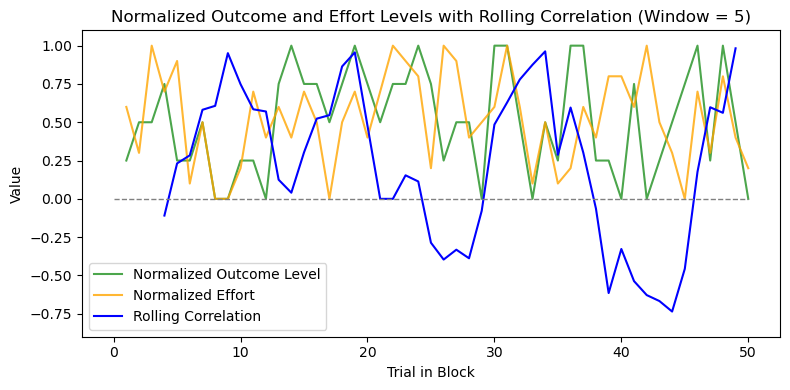

Overall Correlation = 0.25


In [116]:
# Generate the first order of 'approach' trials
seed = 40
schedule_B_approach_order1 = schedule_B_approach.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_B_approach_order1['trial_in_block'] = range(1, len(schedule_B_approach_order1) + 1)

window_size = 5
outcomes = schedule_B_approach_order1['outcome_level']
actual_outcomes = schedule_B_approach_order1['actual_outcome']
efforts = schedule_B_approach_order1['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_B_approach_order1) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_B_approach_order1), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")


#### Approach - Order 2

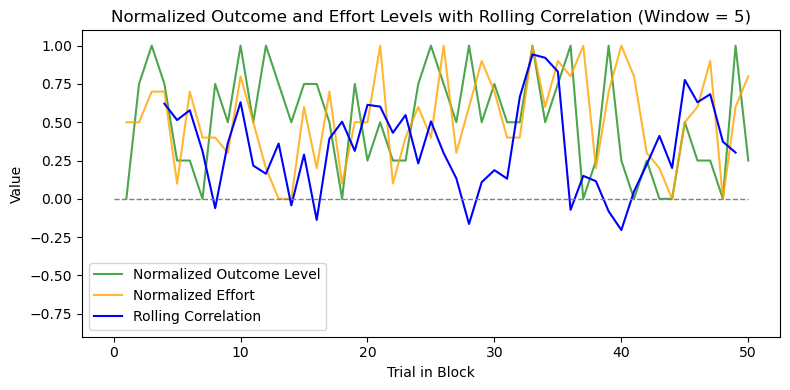

Overall Correlation = 0.25


In [117]:
# Generate the second order of 'approach' trials using a different seed
seed = 50
schedule_B_approach_order2 = schedule_B_approach.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_B_approach_order2['trial_in_block'] = range(1, len(schedule_B_approach_order2) + 1)


window_size = 5
outcomes = schedule_B_approach_order2['outcome_level']
actual_outcomes = schedule_B_approach_order2['actual_outcome']
efforts = schedule_B_approach_order2['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_B_approach_order2) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_B_approach_order2), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")

#### Avoid - Order 1

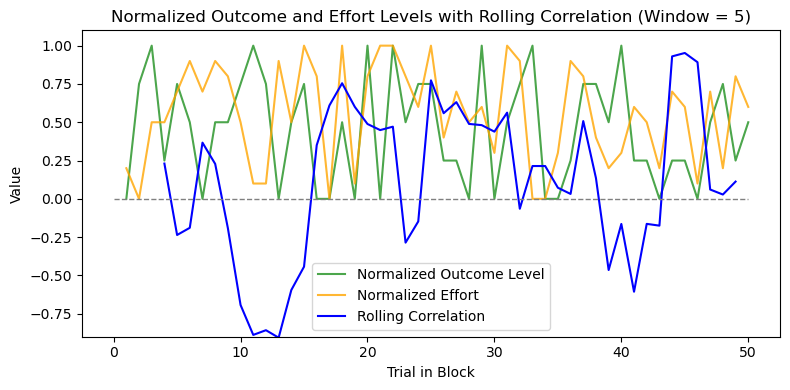

Overall Correlation = 0.11


In [118]:
# Generate the first order of 'avoid' trials
seed = 40
schedule_B_avoid_order1 = schedule_B_avoid.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_B_avoid_order1['trial_in_block'] = range(1, len(schedule_B_avoid_order1) + 1)

window_size = 5
outcomes = schedule_B_avoid_order1['outcome_level']
actual_outcomes = schedule_B_avoid_order1['actual_outcome']
efforts = schedule_B_avoid_order1['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_B_avoid_order1) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_B_avoid_order1), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")


#### Avoid - Order 2

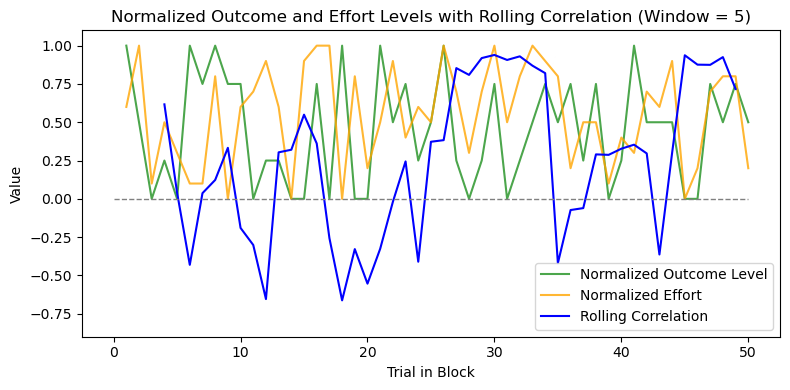

Overall Correlation = 0.11


In [119]:
# Generate the second order of 'approach' trials using a different seed
seed = 50
schedule_B_avoid_order2 = schedule_B_avoid.sample(frac=1, random_state=seed).reset_index(drop=True)
schedule_B_avoid_order2['trial_in_block'] = range(1, len(schedule_B_avoid_order2) + 1)


window_size = 5
outcomes = schedule_B_avoid_order2['outcome_level']
actual_outcomes = schedule_B_avoid_order2['actual_outcome']
efforts = schedule_B_avoid_order2['effort']


# Normalizing data
normalized_outcomes = normalize(outcomes)
normalized_efforts = normalize(efforts)
indices = range(1, len(schedule_B_avoid_order2) + 1)

# Convert normalized data to pandas Series for rolling correlation calculation
series_normalized_outcomes = pd.Series(normalized_outcomes)
series_normalized_efforts = pd.Series(normalized_efforts)

# Calculate rolling correlation
rolling_corr = series_normalized_outcomes.rolling(window=window_size).corr(series_normalized_efforts)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(indices, normalized_outcomes, label='Normalized Outcome Level', color='green', alpha=0.7)
plt.plot(indices, normalized_efforts, label='Normalized Effort', color='orange', alpha=0.8)
plt.plot(rolling_corr.index, rolling_corr, label='Rolling Correlation', color='blue')
plt.ylim(-0.9, 1.1)
plt.xlabel('Trial in Block')
plt.ylabel('Value')
plt.hlines(0, 0, len(schedule_B_avoid_order2), colors='gray', linestyles='dashed', linewidth=1)
plt.title(f'Normalized Outcome and Effort Levels with Rolling Correlation (Window = {window_size})')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate overall correlation
overall_corr = np.corrcoef(normalized_outcomes, normalized_efforts)[0, 1]
print(f"Overall Correlation = {overall_corr:.2f}")

#### Schedule B 1-8

In [120]:
# Define the block order patterns
action_type_patterns = [
    ['approach', 'approach', 'approach', 'approach', 'avoid', 'avoid', 'avoid', 'avoid'],
    ['avoid', 'avoid', 'avoid', 'avoid', 'approach', 'approach', 'approach', 'approach']
]
trial_order_patterns = [
    ['order1', 'order2', 'order1', 'order2', 'order1', 'order2', 'order1', 'order2']
]
attention_focus_patterns = [
    ['heart', 'heart', 'reward', 'reward', 'heart', 'heart', 'reward', 'reward'],
    ['reward', 'reward', 'heart', 'heart', 'reward', 'reward', 'heart', 'heart']
]
global_effort_state_patterns = [
    ['normal', 'shifted', 'normal', 'shifted', 'normal', 'shifted', 'normal', 'shifted'],
    ['shifted', 'normal', 'shifted', 'normal', 'shifted', 'normal', 'shifted', 'normal']
]

# Function to create a schedule from a given pattern
def create_schedule(action_type_pattern, trial_order_pattern, attention_focus_pattern, global_effort_state_pattern):
    trial_schedule = []
    trial_in_experiment = 1

    for block_number in range(8):
        action_type = action_type_pattern[block_number]
        trial_order = trial_order_pattern[block_number]
        attention_focus = attention_focus_pattern[block_number]
        global_effort_state = global_effort_state_pattern[block_number]

        if action_type == 'approach':
            df = schedule_B_approach_order1.copy() if trial_order == 'order1' else schedule_B_approach_order2.copy()
        else:
            df = schedule_B_avoid_order1.copy() if trial_order == 'order1' else schedule_B_avoid_order2.copy()

        df['trial_order'] = trial_order
        df['attention_focus'] = attention_focus
        df['global_effort_state'] = global_effort_state
        df['trial_in_experiment'] = range(trial_in_experiment, trial_in_experiment + len(df))
        df['block_number'] = block_number + 1
        trial_in_experiment += len(df)
        trial_schedule.append(df)

    return pd.concat(trial_schedule)


# Generate the 8 possible schedules
schedules = []
for i, action_type_pattern in enumerate(action_type_patterns):
    for j, trial_order_pattern in enumerate(trial_order_patterns):
        for k, attention_focus_pattern in enumerate(attention_focus_patterns):
            for l, global_effort_state_pattern in enumerate(global_effort_state_patterns):
                schedule = create_schedule(action_type_pattern, trial_order_pattern, attention_focus_pattern, global_effort_state_pattern)
                schedules.append(schedule)
                schedule['schedule_version'] = f'schedule_B_{len(schedules)}'
                file_name = f'schedule_B_{len(schedules)}.csv'
                schedule.to_csv(file_name, index=False)
                print(f'Saved {file_name}')

Saved schedule_B_1.csv
Saved schedule_B_2.csv
Saved schedule_B_3.csv
Saved schedule_B_4.csv
Saved schedule_B_5.csv
Saved schedule_B_6.csv
Saved schedule_B_7.csv
Saved schedule_B_8.csv
